![example](https://www.learner.org/wp-content/uploads/2019/01/American-Cinema-main-fig1.jpg)

# MOVIE GENRE ANALYSIS FOR MICROSOFT COMPANY

**Author:** Diana Nduta Mwaura
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

This project's objective is to provide Microsoft Company with a prescription on which type of movies to create in their bid to generate original video content. The project explores different datasets containing information about movie to determine the best films at the box office currently. Analysis carried out on the data showed that Comedy,Documentary and Fantasy genres had the highest average rating. In addition, Kids and Family/Science/Fantasy generated the highest income in the box office. The overall revenue generated in the box office varied throughout the year with the period between October and December having the highest. Finally, IMAX studio was observed to have the highest turnover in the box office.Microsoft Company should consider creating films that are in the Fantasy, Documentary, Comedy, Kids and Family or Science genres. The company should also target at releasing their movies at the end of the year where the earnings are high. The movie studio of the company can intergrate a structure similar to the IMAX studio.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

Microsoft company wants to start creating original video content. The company requires a report of the detailed analysis of data related to movies to determine which type of films they'll generate and how they'll create the movies. The company's major interest is the performance of the movies in the box office. Therefore my data analysis questions were based on the premise of finding out which type of movies performed best in the box office.

The questions include:
* Which genre of movies has the highest average rating?
* Which genre of movies produced the highest revenue in the box office?
* How does the domestic gross compare to the foreign gross throughout the year?
* Does the theatre date influence the earnings made in the box office?
* Is there a correlation between the production budget and the worldwide gross?
* What are the levels of income that different studios make in the box office?

The above questions are important since they'll enable Microsoft to make informed decisions on which genre of movies will have the highest rating and generate the highest revenue. The stakeholders will get an understanding of how the domestic gross and foreign gross will vary once they've released the movie therefore they can estimate their overall gain. Moreover the company will be able to estimate the profit they'll make based on the relationship between the production budget and worldwide gross.
Furthermore the company will be able to know how to structure their studio to produce high gains.

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

The movie datasets used in the exploratory analysis include Box Office Mojo (size: 3387rows,5 columns), IMDB, Rotten Tomatoes (size: 1560 rows,11 columns), ThemovieDB (size: 26517 rows, 9 columns), and TheNumbers(size: 5782 rows,6 columns). The Box Office Mojo  and TheNumbers are websites that use an algorithm to systematically track box office receipts. Data from the websites could provide invaluable information concerning revenue generated in the box office. IMDB and ThemovieDB are online databases containing movie_related data. The IMDB database consists of various tables such as movie ratings which enables the analysis of different genres with regards to their ratings. Rotten Tomatoes is a website that gathers reviews for movies and TV shows in the United States. Information obtained from the website could be indispensible in dertermining the income generated in the box office. The sample data used in the project consits of a number of variables including average rating, domestic gross, foreign gross, theatre date, popularity, runtime with the target variable being the box office income.
The properties of the variables to be used in the project include; the variables should be related to the genre of the movies and they should have an influence on the revenue made after a film is created.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [3]:
# Loading data from the Box Office Mojo table

bom_movie_gross_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')

bom_movie_gross_df# dataframe object containing the loaded data



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# Loading the Rotten Tomatoes table into the rt_movie_info_df dataframe object

rt_movie_info_df=pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter='\t',index_col=0)

#Displaying the first five contents of the dataframe

rt_movie_info_df.head()


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [5]:
# Loading the TheMovieDB data into the tmdb_movies_csv_df dataframe object
tmdb_movies_csv_df= pd.read_csv('zippedData/tmdb.movies.csv.gz',index_col=0)

# Displaying the contents of the dataframe
tmdb_movies_csv_df


,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [6]:
# Loading the TheNumbers tables to the tn_movie_budgets_df dataframe
tn_movie_budgets_df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

#Displaying the dataframe
tn_movie_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [7]:
# Connecting the sqlite3 IMDB database
conn=sqlite3.connect('zippedData/im.db/im.db')

# Retreiving all the columns from the movie_basics table
movie_basics_df=pd.read_sql("""SELECT*
                FROM movie_basics""",conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [8]:
# Selecting all columns from the movie_ratings table
movie_ratings_df=pd.read_sql("""SELECT*
                    FROM movie_ratings""",conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

## Cleaning the movie_basics table
The first table to be cleaned was the movie_basics table. First presence of duplicated data was confirmed and none were found. Thereafter null values were checked in the columns of the table. The column of interest was the genres column. Since the number of null values to the non_null values were few, the rows containing the null values were dropped.

In [9]:
# Checking for duplicated values in the movie_basics table

movie_basics_df.duplicated().value_counts()


False    146144
dtype: int64

In [10]:
# Checking for null values in the various columns of the movie_basics table
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [11]:
# Dropping null values present in the genres column
movie_basics_df.dropna(subset='genres',inplace=True)

#Checking the removal of the null values from the genres column
movie_basics_df.isna().sum()

movie_id               0
primary_title          0
original_title         2
start_year             0
runtime_minutes    28503
genres                 0
dtype: int64

## Joining the movie_basics and movie_ratings tables

The movie_basics and the movie_ratings tables were joined to form another table called joined_movie_rating_basics. The reason for this was to find out the average ratings of each genre. The average ratings with values greater than 7 were selected to ensure we obtained only the genres with the highest ratings. The first fifteen genres were chosen.

In [16]:
# Selecting the genres, averagerating and genre_avg_rating columns from the resultant table
joined_movie_rating_basics= pd.read_sql("""SELECT genres, averagerating, AVG(averagerating) AS genre_avg_rating
                FROM movie_basics
                JOIN movie_ratings
                USING(movie_id)
                GROUP BY genres
                HAVING genre_avg_rating>7
                ORDER BY genre_avg_rating DESC
                LIMIT 15""",conn)
joined_movie_rating_basics

,genres,averagerating,genre_avg_rating
0,"Comedy,Documentary,Fantasy",9.4,9.4
1,"Documentary,Family,Musical",9.3,9.3
2,"History,Sport",9.2,9.2
3,"Music,Mystery",9.0,9.0
4,Game-Show,9.0,9.0
5,"Drama,Short",8.8,8.8
6,"Drama,Fantasy,War",8.8,8.8
7,"Documentary,News,Sport",8.8,8.8
8,"Documentary,News,Reality-TV",8.8,8.8
9,"Comedy,Drama,Reality-TV",8.8,8.8


## Cleaning of the joined_movie_rating_basics table

Data cleaning was performed on the resultant joined_movie_rating_basics table. Presence of duplicates, missing values and outliers were confirmed. There were no missing values, duplicates or outliers in the data.

In [17]:
#Checking for duplicated values in the movie_rating_basics table
joined_movie_rating_basics.duplicated().value_counts()


False    15
dtype: int64

In [18]:
# Checking for missing values in the table
joined_movie_rating_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            15 non-null     object 
 1   averagerating     15 non-null     float64
 2   genre_avg_rating  15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 488.0+ bytes


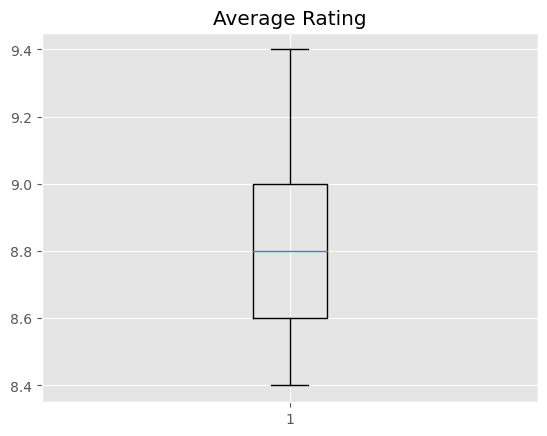

In [19]:
# Checking for outliers in the data
%matplotlib inline
plt.style.use('ggplot')
plt.boxplot(joined_movie_rating_basics['averagerating'])
plt.title('Average Rating')
plt.show()

In [20]:
# Displaying the joined_movie_rating_basics table
joined_movie_rating_basics

,genres,averagerating,genre_avg_rating
0,"Comedy,Documentary,Fantasy",9.4,9.4
1,"Documentary,Family,Musical",9.3,9.3
2,"History,Sport",9.2,9.2
3,"Music,Mystery",9.0,9.0
4,Game-Show,9.0,9.0
5,"Drama,Short",8.8,8.8
6,"Drama,Fantasy,War",8.8,8.8
7,"Documentary,News,Sport",8.8,8.8
8,"Documentary,News,Reality-TV",8.8,8.8
9,"Comedy,Drama,Reality-TV",8.8,8.8


## Cleaning of the Rotten Tomatoes table

The next step was to clean the Rotten Tomatoes table which contained the box office and genre columns. The two columns could give us insights on the performance of different genres based on the revenues they create in the box office. The box office column seemed to have null values which were removed. There was only one duplicated value which was dropped. The box office was an object data type, it was converted to float since we are dealing with currency. The genre and box office column were grouped to find out the mean value of the box office for each genre. The first fifteen rows of the series were selected for plotting.

In [21]:
# Checking for null values in the rotten tomatoes table

rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [23]:
# Dropping the rows in the box office column that contain null values
rt_movie_info_df=rt_movie_info_df.dropna(subset='box_office')
rt_movie_info_df

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...
1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution


In [226]:
# Checking for duplicated values in the rotten tomatoes table
rt_movie_info_df.duplicated().value_counts()


False    339
True       1
dtype: int64

In [227]:
# Checking the unique values in the currency column
rt_movie_info_df['currency'].value_counts()

$    340
Name: currency, dtype: int64

In [228]:
# Dropping the duplicated value
rt_movie_info_df=rt_movie_info_df.drop_duplicates()

In [229]:
# Confirming that the duplicated value is removed
rt_movie_info_df.duplicated().value_counts()

False    339
dtype: int64

In [24]:
# Removing the commas in the box office value 
rt_movie_info_df['box_office']=rt_movie_info_df['box_office'].str.replace(',','')


In [25]:
# Converting the data type of the box office to float
rt_movie_info_df['box_office']= rt_movie_info_df['box_office'].astype('float')

In [232]:
# Grouping the genre and box office colum
rotten_tomatoes=rt_movie_info_df.groupby('genre')['box_office'].mean()

# Sorting the values to obtain the genre with the highest rating
rotten_tomatoes=rotten_tomatoes.sort_values(ascending=False)

# Selecting the first 15 rows
rotten_tomatoes=rotten_tomatoes.iloc[:15]

rotten_tomatoes

genre
Kids and Family|Science Fiction and Fantasy                                    2.618359e+08
Science Fiction and Fantasy                                                    1.908711e+08
Action and Adventure|Science Fiction and Fantasy                               1.420119e+08
Action and Adventure|Drama|Science Fiction and Fantasy                         1.391112e+08
Drama|Horror|Mystery and Suspense|Romance                                      1.285797e+08
Comedy|Kids and Family|Romance                                                 1.277069e+08
Drama|Science Fiction and Fantasy|Romance                                      1.274908e+08
Action and Adventure|Animation|Kids and Family                                 1.231882e+08
Action and Adventure|Drama|Mystery and Suspense|Science Fiction and Fantasy    1.190000e+08
Action and Adventure|Animation|Comedy                                          1.140536e+08
Action and Adventure|Animation|Comedy|Drama|Kids and Family               

## Cleaning of the Box Office Mojo table
The third table which information was extracted from is the box office mojo table. The columns of interest were the foreign gross column and the domestic gross column. The variation of the domestic gross and the foreign gross throughout the year can enable Microsoft Company to make projections on the amount of money they'll make after creating a movie. None of the columns contained duplicated values. The foreign gross column showed a significant number of null values therefore the percentage of null values had to be calculated in order to make a decision on how to deal with the values. A percentage value of 40% was obtained which justified the decision to drop the rows containing null values.

In [233]:
# Checking for duplicated values in the bom_movie_gross_df dataframe
bom_movie_gross_df.duplicated().value_counts()

False    3387
dtype: int64

In [234]:
#Checking for null values in the columns
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [235]:
# Chexking for the percentage of null values in the foreign gross column
bom_movie_gross_df1=len(bom_movie_gross_df[bom_movie_gross_df['foreign_gross'].isna()])/len(bom_movie_gross_df)

bom_movie_gross_df1

0.3985828166519043

In [236]:
bom_movie_gross_df.dropna(subset='foreign_gross',inplace=True)
bom_movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [237]:
bom_movie_gross_df2=len(bom_movie_gross_df[bom_movie_gross_df['domestic_gross'].isna()])/len(bom_movie_gross_df)
bom_movie_gross_df2

0.013745704467353952

In [238]:
bom_movie_gross_df['domestic_gross'].fillna(bom_movie_gross_df['domestic_gross'].median())
bom_movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [239]:
bom_movie_gross_df['foreign_gross']=bom_movie_gross_df['foreign_gross'].str.replace(',','')

In [240]:
bom_movie_gross_df['foreign_gross']= bom_movie_gross_df['foreign_gross'].astype('float')

In [241]:
bom_movie_gross=bom_movie_gross_df.groupby('year').sum()
#bom_movie_gross=bom_movie_gross.sort_values(ascending=False)
bom_movie_gross=bom_movie_gross.iloc[:15]

bom_movie_gross

,domestic_gross,foreign_gross
year,,
2010,1.015284e+10,1.437426e+10
2011,9.915761e+09,1.567099e+10
2012,1.069786e+10,1.703789e+10
2013,1.055885e+10,1.661239e+10
2014,1.014798e+10,1.697197e+10
2015,1.074487e+10,1.520396e+10
2016,1.086969e+10,1.911904e+10
2017,1.051677e+10,2.005093e+10
2018,1.076436e+10,1.747449e+10


In [242]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 339 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      339 non-null    object 
 1   rating        339 non-null    object 
 2   genre         339 non-null    object 
 3   director      299 non-null    object 
 4   writer        272 non-null    object 
 5   theater_date  333 non-null    object 
 6   dvd_date      333 non-null    object 
 7   currency      339 non-null    object 
 8   box_office    339 non-null    float64
 9   runtime       337 non-null    object 
 10  studio        304 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.8+ KB


In [243]:
rt_movie_info_df.dropna(subset='theater_date',inplace=True)


C:\Users\felix\AppData\Local\Temp\ipykernel_11748\1658316101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_df.dropna(subset='theater_date',inplace=True)


In [244]:
rt_movie_info_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   synopsis      333 non-null    object 
 1   rating        333 non-null    object 
 2   genre         333 non-null    object 
 3   director      295 non-null    object 
 4   writer        269 non-null    object 
 5   theater_date  333 non-null    object 
 6   dvd_date      333 non-null    object 
 7   currency      333 non-null    object 
 8   box_office    333 non-null    float64
 9   runtime       331 non-null    object 
 10  studio        300 non-null    object 
dtypes: float64(1), object(10)
memory usage: 31.2+ KB


In [245]:
rt_movie_info_df['theater_date']=rt_movie_info_df['theater_date'].map(lambda x : x[:3])
rt_movie_info_df

C:\Users\felix\AppData\Local\Temp\ipykernel_11748\2974015507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_df['theater_date']=rt_movie_info_df['theater_date'].map(lambda x : x[:3])


,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,Aug,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,Jan,"Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures
13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,Apr,"Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics
14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,Jun,"Nov 9, 2010",$,134904.0,117 minutes,NaN
22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,Dec,"Apr 5, 2011",$,1039869.0,108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...
1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,Sep,"Dec 20, 2005",$,25335935.0,119 minutes,Universal Pictures
1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,Oct,"Nov 20, 2012",$,1416189.0,129 minutes,Eros Entertainment
1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,Jun,"Oct 9, 2007",$,59371.0,98 minutes,IDP Distribution


In [246]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
rt_movie_info_df['theater_date']=pd.Categorical(rt_movie_info_df['theater_date'],categories=months,ordered=True)


C:\Users\felix\AppData\Local\Temp\ipykernel_11748\4143850518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_df['theater_date']=pd.Categorical(rt_movie_info_df['theater_date'],categories=months,ordered=True)


In [247]:
rt_movie_info=rt_movie_info_df.groupby('theater_date')['box_office'].mean()
rt_movie_info

theater_date
Jan    3.740066e+07
Feb    4.518768e+07
Mar    2.867936e+07
Apr    3.041570e+07
May    3.970367e+07
Jun    5.163442e+07
Jul    3.977743e+07
Aug    2.309728e+07
Sep    2.063305e+07
Oct    3.533408e+07
Nov    5.565870e+07
Dec    5.257316e+07
Name: box_office, dtype: float64

In [248]:
tn_movie_budgets_df.duplicated().value_counts()

False    5782
dtype: int64

In [249]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [250]:
tn_movie_budgets_df['worldwide_gross']=tn_movie_budgets_df['worldwide_gross'].str.replace(',','')
tn_movie_budgets_df['worldwide_gross']=tn_movie_budgets_df['worldwide_gross'].str.replace('$','')


C:\Users\felix\AppData\Local\Temp\ipykernel_11748\402522410.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movie_budgets_df['worldwide_gross']=tn_movie_budgets_df['worldwide_gross'].str.replace('$','')


In [251]:
tn_movie_budgets_df['worldwide_gross']= tn_movie_budgets_df['worldwide_gross'].astype('float')

In [252]:
tn_movie_budgets_df['production_budget']=tn_movie_budgets_df['production_budget'].str.replace(',','')
tn_movie_budgets_df['production_budget']=tn_movie_budgets_df['production_budget'].str.replace('$','')

C:\Users\felix\AppData\Local\Temp\ipykernel_11748\690138278.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movie_budgets_df['production_budget']=tn_movie_budgets_df['production_budget'].str.replace('$','')


In [253]:
tn_movie_budgets_df['production_budget']= tn_movie_budgets_df['production_budget'].astype('float')

In [254]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   object 
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 271.2+ KB


In [255]:
correlation=np.corrcoef(tn_movie_budgets_df['worldwide_gross'],tn_movie_budgets_df['production_budget'])
correlation[0][1]

0.7483059765694747

In [256]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   synopsis      333 non-null    object  
 1   rating        333 non-null    object  
 2   genre         333 non-null    object  
 3   director      295 non-null    object  
 4   writer        269 non-null    object  
 5   theater_date  333 non-null    category
 6   dvd_date      333 non-null    object  
 7   currency      333 non-null    object  
 8   box_office    333 non-null    float64 
 9   runtime       331 non-null    object  
 10  studio        300 non-null    object  
dtypes: category(1), float64(1), object(9)
memory usage: 29.3+ KB


In [259]:
rt_movie_info_df.dropna(subset='studio',inplace=True)

C:\Users\felix\AppData\Local\Temp\ipykernel_11748\1376268792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_movie_info_df.dropna(subset='studio',inplace=True)


In [260]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 3 to 1996
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   synopsis      300 non-null    object  
 1   rating        300 non-null    object  
 2   genre         300 non-null    object  
 3   director      266 non-null    object  
 4   writer        245 non-null    object  
 5   theater_date  300 non-null    category
 6   dvd_date      300 non-null    object  
 7   currency      300 non-null    object  
 8   box_office    300 non-null    float64 
 9   runtime       299 non-null    object  
 10  studio        300 non-null    object  
dtypes: category(1), float64(1), object(9)
memory usage: 26.5+ KB


In [293]:
rt_movie_info_df=rt_movie_info_df.groupby('studio').mean()
rt_movie_info_df=rt_movie_info_df.reset_index()

rt_movie_info_df=rt_movie_info_df.sort_values(by='box_office',ascending=False)
rt_movie_info_df

,studio,box_office
43,IMAX,257704099.0
62,Newmarket Film Group,201093893.5
101,Universal,148734225.0
22,DreamWorks SKG,128579698.0
66,Paramount,127490802.0
...,...,...
45,Indican Pictures,25658.0
60,Monterey Media,22099.0
71,Phase 4 Films,16632.0
36,First Run Features,8856.0


In [294]:
rt_movie_info_df=rt_movie_info_df.iloc[:10]

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:

* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

## Histigram displaying the joined_movie_rating_basics table

The joined_movie_rating_basics table was analyzed using a histogram with the genres in the x axis and the genre average rating in the y axis. The histogram clearly showed the genres with the highest rating according to the table with the first three being Comedy|Documentary|Fantasy, Documentary|Family|Musical and History|Sports. 

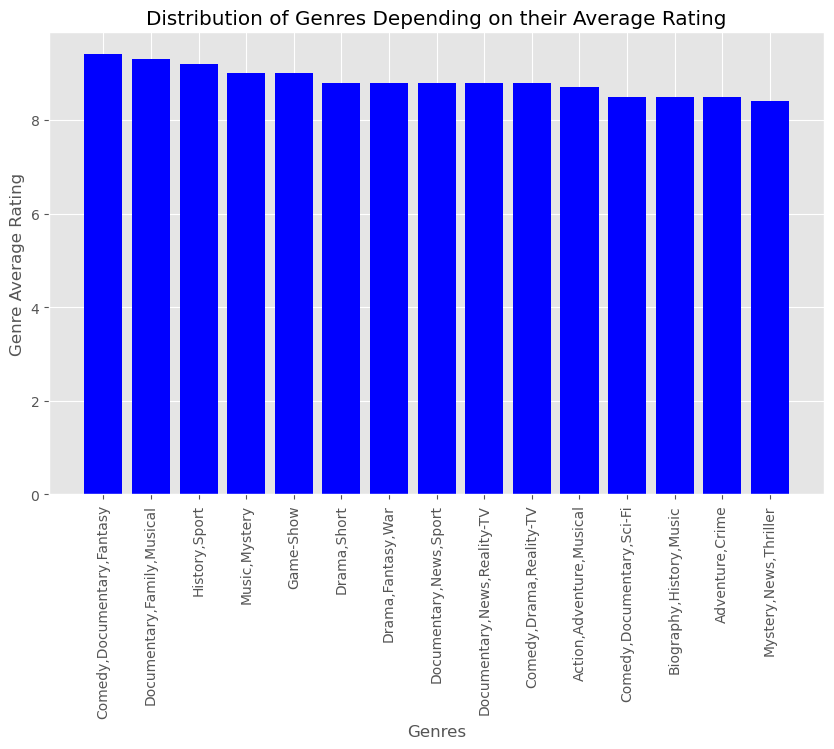

In [35]:
plt.figure(figsize=(10,6))
plt.bar(joined_movie_rating_basics['genres'],joined_movie_rating_basics['genre_avg_rating'],color='blue')
plt.xticks(rotation=90)
plt.ylabel('Genre Average Rating')
plt.xlabel("Genres")
plt.title('Distribution of Genres Depending on their Average Rating')
plt.show()

<AxesSubplot:ylabel='genre'>

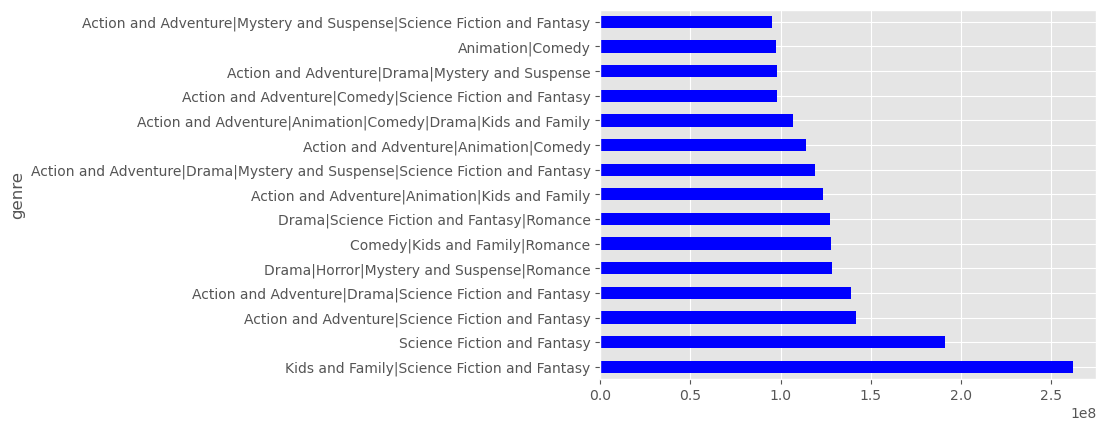

In [142]:
rotten_tomatoes.plot(kind='barh',color='blue')

<AxesSubplot:xlabel='year'>

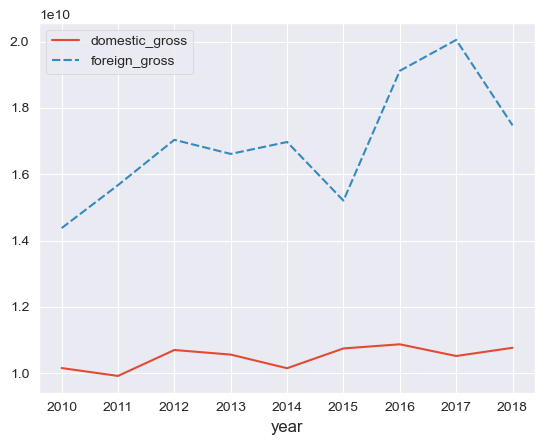

In [143]:
sns.set_style('darkgrid')
sns.lineplot(data=bom_movie_gross)

<AxesSubplot:xlabel='theater_date', ylabel='box_office'>

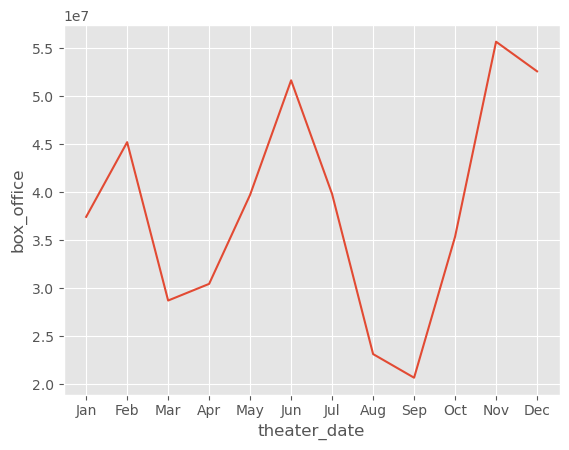

In [90]:

sns.lineplot(rt_movie_info)

<AxesSubplot:xlabel='production_budget', ylabel='worldwide_gross'>

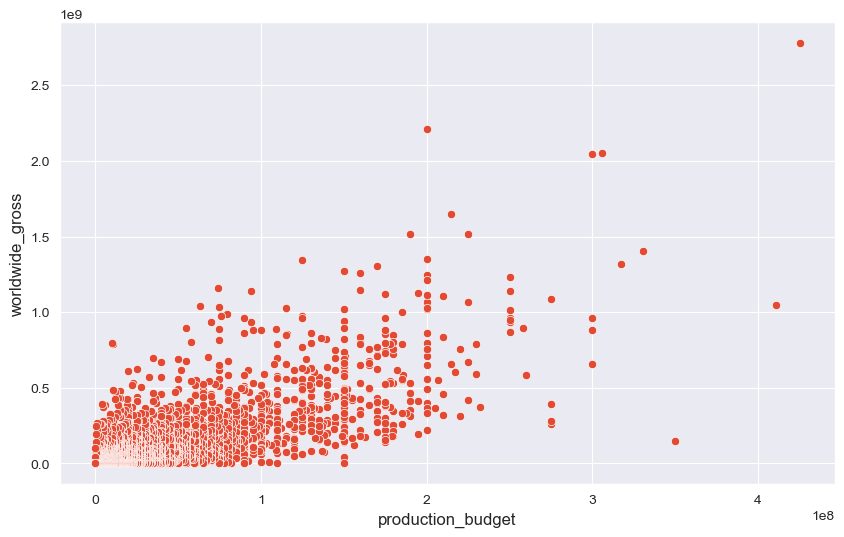

In [151]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=tn_movie_budgets_df,x='production_budget',y='worldwide_gross')

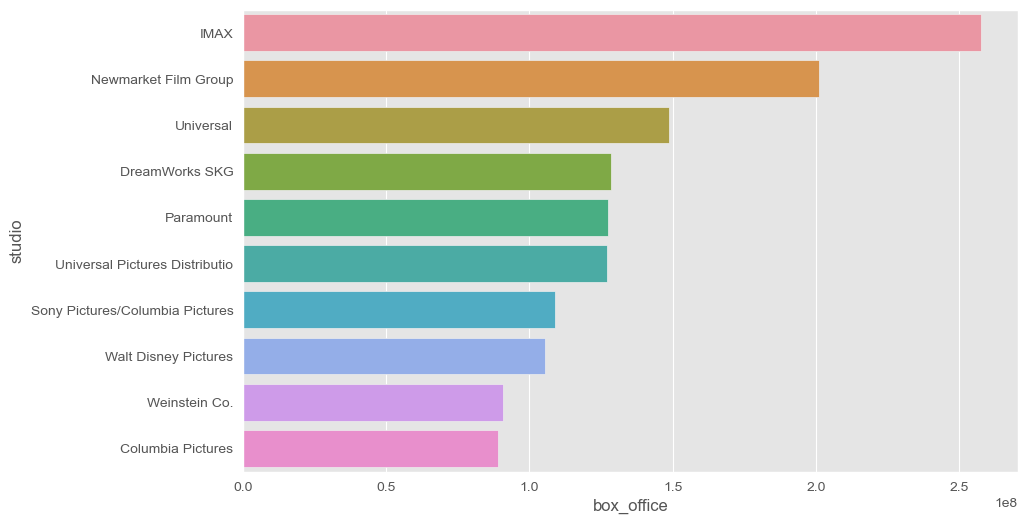

In [304]:
ax,fig=plt.subplots(figsize=(10,6))

plot=sns.barplot(data=rt_movie_info_df,y=rt_movie_info_df['studio'],x=rt_movie_info_df['box_office'],orient='h')



## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***